In [25]:
import numpy as np
import pyfits
import math
from math import log10
import matplotlib.pyplot as plt
import scipy
from scipy.stats import binned_statistic
from scipy.stats import binned_statistic_2d
from matplotlib import rc
import pickle
import os
import astropy as ap
from astropy.cosmology import WMAP7
from scipy import interpolate
import corner
import matplotlib.patheffects as patheffects
from matplotlib import rcParams
from matplotlib.path import Path
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import rc
from matplotlib import colors
from __future__ import unicode_literals
# rcParams["font.size"] = 16
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Computer Modern Sans"]
rcParams["text.usetex"] = True
rcParams["text.latex.preamble"] = r"\usepackage{cmbright}"

rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'

# rcParams['font.family'] = 'serif'
# rcParams['font.serif'] = 'Ubuntu'
# rcParams['font.monospace'] = 'Ubuntu Mono'
rcParams['font.size'] = 22
rcParams['axes.labelsize'] = 22
rcParams['axes.labelweight'] = 'bold'
rcParams['axes.titlesize'] = 17
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['legend.fontsize'] = 16
rcParams['figure.titlesize'] = 1





In [26]:
os.chdir('/Users/nitya/Work/Data/Project1/measurements')

ile = open(r'interpolated_data_radec.pkl','rb')
d = pickle.load(ile, encoding ='latin1')
ile.close()
print(d.dtype.names)

ile2 = open(r'jk_list.pkl','rb')
ids = pickle.load(ile2, encoding ='latin1')
ile2.close()



('nsaid', 'z', 'ra', 'dec', 'opt', 'inf', 'mass', 'magsfr', 'magphys', 'uv', 'uvssfr', 'env')


In [27]:
#Let's first define a "binning" function from the interpolated data and reproduce

def binning(d):
    
    t = binned_statistic_2d(d['inf'],d['opt'],d['nsaid'],statistic = 'count',bins = (25,25))
    
    b = np.reshape(np.asarray(t[3]),(len(d['nsaid']),1))
    bins = np.unique(t[3])
    
    li = np.column_stack((b,d['nsaid']))
    wut = d.view((float, len(d.dtype.names)))
    new = np.column_stack((b,wut[:,1:]))
    

    li = li[li[:,0].argsort()]
    new = new[new[:,0].argsort()]
    
    n1 = [np.where(new[:,0] == bins[i]) for i in range(len(bins))]
    new1 =  np.array([np.mean(new[n1[i]], axis = 0) for i in range(len(bins))])
    counts = np.asarray([len(new[n1[i]]) for i in range(len(bins))])
    idlist = np.asarray([li[:,1][n1[i]] for i in range(len(bins))])
    
    thing = np.where(counts>=5)[0]
    stuff = np.column_stack((new1,counts))[thing].tolist()
    stuff = [tuple(stuff[i]) for i in range(len(stuff))]
    idlist = idlist[thing]
    
    #'nsaid', 'z', 'ra', 'dec', 'opt', 'inf', 'mass', 'magsfr', 'magphys', 'uv', 'uvssfr', 'env'
    q = (np.array(stuff,dtype=[('bin','float'),('z','float'),('ra','float'), ('dec','float'),
                                ('opt','float'),('inf','float'), ('mass','float'),
                                ('magsfr','float'),('magphys','float'), ('uvsfr','float'), 
                                ('uv','float'), ('env', 'float'),('counts','int')]))
    return(q,idlist)


In [28]:
q, dat = binning(d)
data = np.column_stack((q['magphys'],q['uv']))

(23,)
(63,)
(145,)


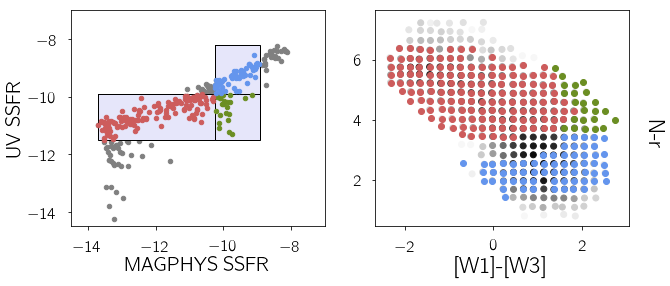

In [55]:
os.chdir('/Users/nitya/Work/Plots/Project1')

ve1 = [(-10.25, -9.9), (-10.25, -11.5),(-8.9,-11.5),(-8.9,-9.9),(-10.25, -9.9)]
ve2 = [(-10.25, -8.2), (-10.25, -9.9), (-8.9, -9.9),(-8.9,-8.2),(-10.25, -8.2)]
ve3 = [(-13.7, -9.9),(-13.7, -11.5), (-10.25, -11.5),(-10.25,-9.9),(-13.7, -9.9)]

p1 = Path(ve1)
in1 = p1.contains_points(data)
bo1 = q[in1]
print(np.shape(bo1))
p2 = Path(ve2)
in2 = p2.contains_points(data)
bo2 = q[in2]
print(np.shape(bo2))
p3 = Path(ve3)
in3 = p3.contains_points(data)
bo3 = q[in3]
print(np.shape(bo3))

# x = [-15.0, -12.0, -7.0]
# y = [-15.0, -12.0, -7.0]

# m = 0.50
# c = 4.5

# y2 = [m*x[i] - c for i in range(len(x))]

patch1 = patches.PathPatch(p1, facecolor='lavender', lw=1)
patch2 = patches.PathPatch(p2, facecolor='lavender', lw=1)
patch3 = patches.PathPatch(p3, facecolor='lavender', lw=1)

f = plt.figure(figsize=(10,4)) 
ax = [f.add_subplot(1,2,i+1) for i in range(2)]
#f.subplots_adjust(wspace=1, hspace = 1)

ax1 = ax[0]
ax2 = ax[1]

cs1 = ax1.scatter(data[:,0],data[:,1], color = 'grey',s = 20)
ax1.add_patch(patch1)
ax1.add_patch(patch2)
ax1.add_patch(patch3)
ax1.scatter(data[in1,0], data[in1,1], color = 'olivedrab',s = 20, zorder = 2)
ax1.scatter(data[in3,0], data[in3,1],color = 'indianred',s = 20, zorder = 2)
ax1.scatter(data[in2,0], data[in2,1],color = 'cornflowerblue',s = 20, zorder = 2)
#ax1.plot(x,y, color = 'y', linestyle = '--')
#ax1.plot(x,y2, color = 'y', linestyle = '--')
ax1.plot

ax1.set_xlim(-14.5,-7.0)
ax1.set_ylim(-14.5,-7.0)
ax1.set_xlabel('MAGPHYS SSFR', fontsize = 20)
ax1.set_ylabel('UV SSFR', fontsize = 20)

cs2 = ax2.scatter(q['inf'],q['opt'],c = np.log10(q['counts']), cmap = plt.cm.gray_r )
cs2a = ax2.scatter(bo1['inf'],bo1['opt'], color = 'olivedrab')
cs2b = ax2.scatter(bo2['inf'],bo2['opt'], color = 'cornflowerblue')
cs2c = ax2.scatter(bo3['inf'],bo3['opt'], color = 'indianred')
ax2.set_xlabel('[W1]-[W3]')
#ax2.set_ylabel('N-r')
# plt.colorbar(cs2)
f.text(.935, 0.52, 'N-r', ha='center', va='center', rotation=270, fontsize = 22)
plt.gcf().subplots_adjust(top=0.95, bottom = 0.2)
plt.savefig('outliers.pdf')
plt.show()

In [30]:

def func(data,ve,dat,g):
    p = Path(ve)
    inside = p.contains_points(data)
    #print(len(data[inside]))
    h = dat[inside]
    ids = np.concatenate(h).ravel()
    #print(len(ids))
    ind1 = np.in1d(g['nsaid'],ids)
    g1 = g[ind1]
    #print(len(g1))
    return g1

def masscut(array,mass,min,max):
    index1 = np.where(mass>=min)[0]
    array = array[index1]
    mass = mass[index1]
    index2 = np.where(mass<=max)[0]
    return array[index2]

    
#massbins
#envbins
massbins = np.linspace(9.5,10.7,7)
print(massbins)
envbins = np.linspace(0,1.5,4)
print(envbins)

[  9.5   9.7   9.9  10.1  10.3  10.5  10.7]
[ 0.   0.5  1.   1.5]


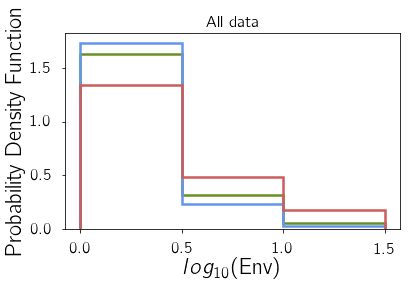

In [31]:
#the entire sample

g1 = func(data,ve1,dat,d)
g2 = func(data,ve2,dat,d)
g3 = func(data,ve3,dat,d)
    
g1 = masscut(g1,g1['mass'],9.5,10.7)
g2 = masscut(g2,g2['mass'],9.5,10.7)
g3 = masscut(g3,g3['mass'],9.5,10.7)
    
mass1 = g1['mass'].reshape(len(g1),1)
mass2 = g2['mass'].reshape(len(g2),1)
mass3 = g3['mass'].reshape(len(g3),1)
    
totenv1 = g1['env'].reshape(len(g1),1)
totenv2 = g2['env'].reshape(len(g2),1)
totenv3 = g3['env'].reshape(len(g3),1)
y1 = plt.hist(np.log10(totenv1), bins=envbins, normed = 1, histtype = 'step', fill = False,color = 'olivedrab',linewidth=2.5)
y2 = plt.hist(np.log10(totenv2), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'cornflowerblue', linewidth=2.5)
y3 = plt.hist(np.log10(totenv3), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'indianred',linewidth=2.5)


plt.xlabel(r'$log_{10}$(Env)')
plt.ylabel('Probability Density Function')
plt.title('All data')
plt.gcf().subplots_adjust(bottom = 0.2)
plt.savefig('Environments1.pdf')
plt.show()

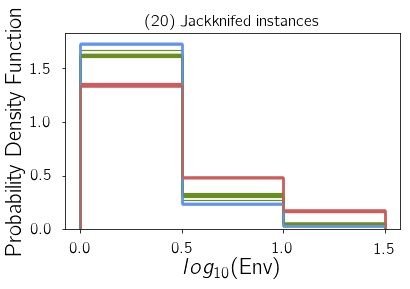

In [32]:
array1 =[]
array2 = []
array3 = []

for i in range(len(ids)):
    #get the new binned arrays
    new = np.setdiff1d(d['nsaid'],ids[i])
    index = np.in1d(d['nsaid'],new)
    newq,newdat = binning(d[index])
    #print(len(ids[i]),len(d[index]))
    
    sample = np.column_stack((newq['magphys'],newq['uv']))
    g1 = func(sample,ve1,newdat,d[index])
    g2 = func(sample,ve2,newdat,d[index])
    g3 = func(sample,ve3,newdat,d[index])
    
    g1 = masscut(g1,g1['mass'],9.5,10.7)
    g2 = masscut(g2,g2['mass'],9.5,10.7)
    g3 = masscut(g3,g3['mass'],9.5,10.7)
    
    mass1 = g1['mass'].reshape(len(g1),1)
    mass2 = g2['mass'].reshape(len(g2),1)
    mass3 = g3['mass'].reshape(len(g3),1)
    
    env1 = g1['env'].reshape(len(g1),1)
    env2 = g2['env'].reshape(len(g2),1)
    env3 = g3['env'].reshape(len(g3),1)
    
    a = plt.hist(np.log10(env1), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'olivedrab', linewidth=1.2)
    b = plt.hist(np.log10(env2), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'cornflowerblue', linewidth=1.2)
    c = plt.hist(np.log10(env3), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'indianred', linewidth=1.2)
    array1.append(a[0])
    print
    array2.append(b[0])
    array3.append(c[0])

# y1 = plt.hist(np.log10(totenv1), bins=envbins, normed = 1, histtype = 'step',linestyle = '--', fill = False, color = 'olivedrab',linewidth=2.2)
# y2 = plt.hist(np.log10(totenv2), bins=envbins, normed = 1, histtype = 'step',linestyle = '--', fill = False, color = 'cornflowerblue', linewidth=2.2)
# y3 = plt.hist(np.log10(totenv3), bins=envbins, normed = 1, histtype = 'step',linestyle = '--', fill = False, color = 'indianred',linewidth=2.2)
plt.xlabel(r'$log_{10}$(Env)')
plt.ylabel('Probability Density Function')
plt.title('(20) Jackknifed instances')
plt.gcf().subplots_adjust(bottom = 0.2)
plt.savefig('Jackknifed_instances.png')
plt.show()

In [33]:
print(y1[0])

[ 1.625       0.31976744  0.05523256]


[ 1.66942149  1.63344051  1.62594268  1.62557078  1.62558502  1.61387632
  1.61818182  1.61329305  1.63258786  1.62006079  1.62153846  1.62742176
  1.63751987  1.6384      1.62576687  1.6105919   1.62518741  1.6237037
  1.61609907  1.61689291]


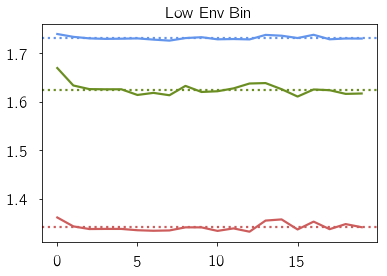

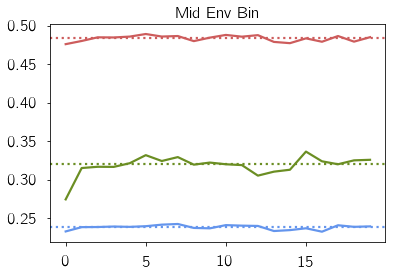

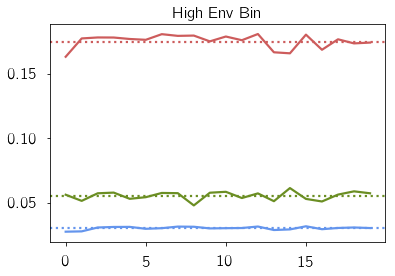

In [34]:
print(np.array(array1)[:,0])


plt.plot(np.array(array1)[:,0], color = 'olivedrab', linewidth = 2.2)
plt.axhline(y = y1[0][0], linestyle = ':', color = 'olivedrab', linewidth = 2.2)
plt.plot(np.array(array2)[:,0], color = 'cornflowerblue', linewidth = 2.2)
plt.axhline(y = y2[0][0], linestyle = ':', color = 'cornflowerblue', linewidth = 2.2)
plt.plot(np.array(array3)[:,0], color = 'indianred', linewidth = 2.2)
plt.axhline(y = y3[0][0], linestyle = ':', color = 'indianred', linewidth = 2.2)
plt.title('Low Env Bin')
plt.savefig('low_env_bin.png')
plt.show()


plt.plot(np.array(array1)[:,1], color = 'olivedrab', linewidth = 2.2)
plt.axhline(y = y1[0][1], linestyle = ':', color = 'olivedrab', linewidth = 2.2)
plt.plot(np.array(array2)[:,1], color = 'cornflowerblue', linewidth = 2.2)
plt.axhline(y = y2[0][1], linestyle = ':', color = 'cornflowerblue', linewidth = 2.2)
plt.plot(np.array(array3)[:,1], color = 'indianred', linewidth = 2.2)
plt.axhline(y = y3[0][1], linestyle = ':', color = 'indianred', linewidth = 2.2)
plt.title('Mid Env Bin')
plt.savefig('mid_env_bin.png')
plt.show()

plt.plot(np.array(array1)[:,2], color = 'olivedrab', linewidth = 2.2)
plt.axhline(y = y1[0][2], linestyle = ':', color = 'olivedrab', linewidth = 2.2)
plt.plot(np.array(array2)[:,2], color = 'cornflowerblue', linewidth = 2.2)
plt.axhline(y = y2[0][2], linestyle = ':', color = 'cornflowerblue', linewidth = 2.2)
plt.plot(np.array(array3)[:,2], color = 'indianred', linewidth = 2.2)
plt.axhline(y = y3[0][2], linestyle = ':', color = 'indianred', linewidth = 2.2)
plt.title('High Env Bin')
plt.savefig('high_env_bin.png')
plt.show()

In [35]:
def rms(ar,value):
    thing = [(ar[i]-value)**2 for i in range(len(ar))]
    print(np.sum(thing))
    rms = (np.sum(thing))**0.5
    return rms

In [36]:
er1 = [rms(np.array(array1)[:,i],y1[0][i]) for i in range(3)]
print(er1)
er2 = [rms(np.array(array2)[:,i],y2[0][i]) for i in range(3)]
print(er2)
er3 = [rms(np.array(array3)[:,i],y3[0][i]) for i in range(3)]
print(er3)

0.00314431818999
0.00307194663867
0.000214299780041
[0.056074220368988743, 0.055425144462344776, 0.014638981523344405]
0.000259174719684
0.000160690968604
2.63030536819e-05
[0.016098904300720925, 0.012676394148353027, 0.0051286502787721263]
0.00138400270474
0.000288026558893
0.000520022571896
[0.037202186827393895, 0.016971345229317203, 0.022804003418175105]


In [37]:
#     a = plt.hist(np.log10(env1), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'olivedrab', linewidth=1.2)
#     b = plt.hist(np.log10(env2), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'cornflowerblue', linewidth=1.2)
#     c = plt.hist(np.log10(env3), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'indianred', linewidth=1.2)
#     array1.append(a[0])
#     array2.append(b[0])
#     array3.append(c[0])

print(array1)

[array([ 1.66942149,  0.27438017,  0.05619835]), array([ 1.63344051,  0.31511254,  0.05144695]), array([ 1.62594268,  0.31674208,  0.05731523]), array([ 1.62557078,  0.31659056,  0.05783866]), array([ 1.62558502,  0.32137285,  0.05304212]), array([ 1.61387632,  0.33182504,  0.05429864]), array([ 1.61818182,  0.32424242,  0.05757576]), array([ 1.61329305,  0.32930514,  0.05740181]), array([ 1.63258786,  0.31948882,  0.04792332]), array([ 1.62006079,  0.32218845,  0.05775076]), array([ 1.62153846,  0.32      ,  0.05846154]), array([ 1.62742176,  0.31892697,  0.05365127]), array([ 1.63751987,  0.30524642,  0.0572337 ]), array([ 1.6384,  0.3104,  0.0512]), array([ 1.62576687,  0.31288344,  0.06134969]), array([ 1.6105919,  0.3364486,  0.0529595]), array([ 1.62518741,  0.32383808,  0.05097451]), array([ 1.6237037,  0.32     ,  0.0562963]), array([ 1.61609907,  0.3250774 ,  0.05882353]), array([ 1.61689291,  0.32579186,  0.05731523])]


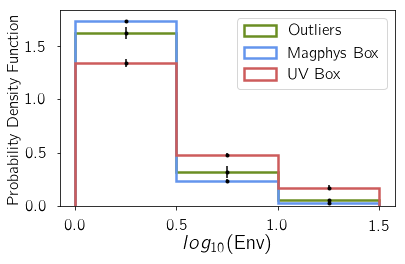

In [42]:
y1 = plt.hist(np.log10(totenv1), bins=envbins, normed = 1, histtype = 'step', fill = False,color = 'olivedrab',linewidth=2.5, label = 'Outliers')
xbins = [(y1[1][i] + y1[1][i+1])*0.5 for i in range(len(y1[0])) ]
plt.errorbar(x = xbins,y = y1[0], yerr = er1, fmt = '.k')
y2 = plt.hist(np.log10(totenv2), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'cornflowerblue', linewidth=2.5, label = 'Magphys Box')
plt.errorbar(x = xbins,y = y2[0], yerr = er2, fmt = '.k')
y3 = plt.hist(np.log10(totenv3), bins=envbins, normed = 1, histtype = 'step', fill = False, color = 'indianred',linewidth=2.5, label = 'UV Box')
plt.errorbar(x = xbins,y = y3[0], yerr = er3, fmt = '.k')

plt.xlabel(r'$log_{10}$(Env)', fontsize = 20)
plt.ylabel('Probability Density Function', fontsize = 16)
# plt.title('Environment Distribution')
plt.gcf().subplots_adjust(bottom = 0.2)
plt.legend()
# plt.yscale('log')
plt.savefig('jk_plot.pdf')
plt.show()